In [3]:
import logging

from utils import logging as lg


lg.set_logging(logging.ERROR)

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.ERROR)

import math

from utils import data_provider
from utils import experiment_artifact
from notebook_utils import plot
from model import s2_network, s3_network
plot.setup()


# Data Preparation

In [5]:
X_train, Y_train = data_provider.get_mnist('train', dir_path='../data/mnist')
X_test, Y_test = data_provider.get_mnist('test', dir_path='../data/mnist')

In [6]:
X_train_2d = np.copy(X_train.reshape((-1,28,28)))
X_test_2d = np.copy(X_test.reshape((-1,28,28)))

In [7]:
def plot_heatmap(data_idx, s2_models,  s3_models, colorbar=False, suptitle='', highlight_plots=[]):
    global count
    
    no_cols = np.max([len(s2_models), len(s3_models)]) + 1
    plt.figure(figsize=(5*no_cols,12))
    plt.suptitle(suptitle)

    x = X_test_2d[data_idx,:,:]
    y_target = np.argmax(Y_test[data_idx])

    plt.subplot(2,no_cols,1)
    plt.title('Data Label %d' % y_target)
    plt.imshow(x)
    if colorbar:
        plt.colorbar()

    count = 2
    def plot_models(models):
        global count
        for k, l, f in models:
            ax = plt.subplot(2,no_cols,count)
            model = l.load(f)
            pred_label, heatmap = model.lwr(x, debug=False)
            plt.title('%s\n%s\n%s\n(no. variables %d, acc=%.4f)\npred %d' %
                      (model._.architecture_name, model._.experiment_name, model._.architecture, 
                       model.dag.no_variables(), model._.accuracy, pred_label))
            plt.imshow(heatmap, cmap='Reds')
            
            if count in highlight_plots:
                for axis in ['top','bottom','left','right']:
                    ax.spines[axis].set_linewidth(5)

            if colorbar:
                plt.colorbar()
            count = count + 1
            if count-1 % no_cols == 0:
                count + 1 # skip 1st col
            
    plot_models(s2_models)
    count = count + 1 # skip 1st col for 2nd row
    plot_models(s3_models)
    
    plt.show() 

# Network
## S2 network ( 1st architecture )
![](https://i.imgur.com/BNLuFy2.png)
## S3 network ( 2nd architecture )
![](https://i.imgur.com/zMBa1pi.png)

# Sprint 4th: LWR

## Seq Legth : 7 ( 4 cols feed )

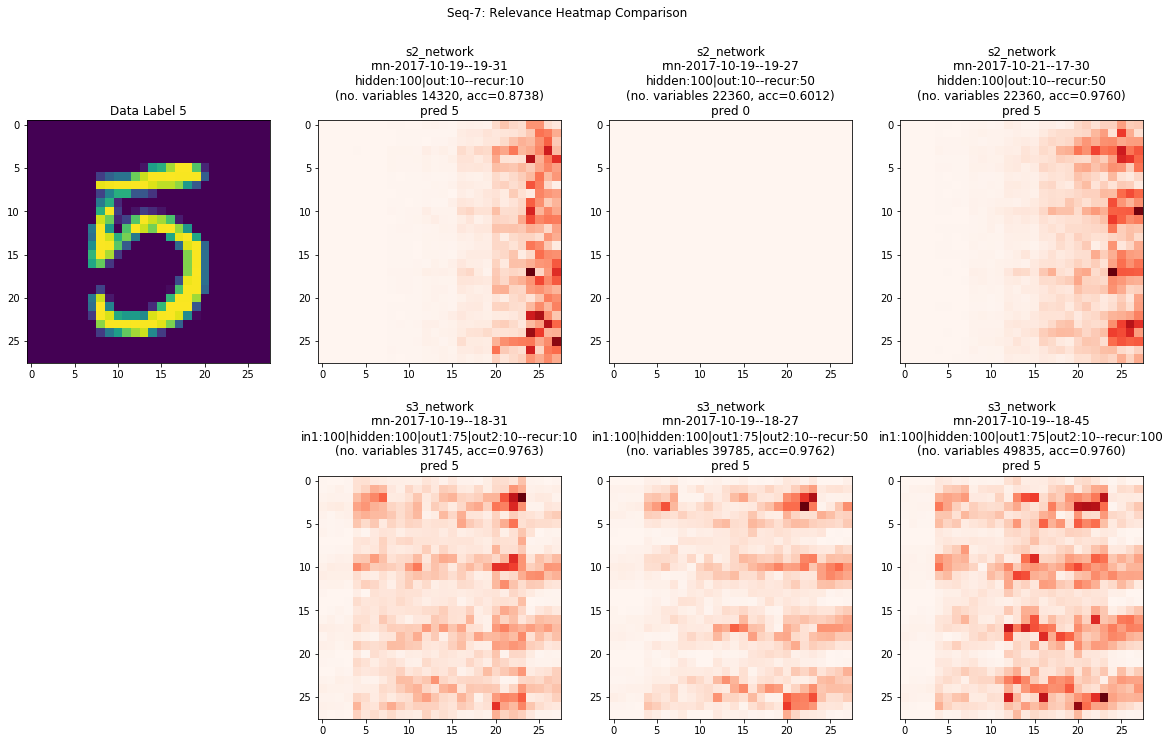

In [7]:
s2_seq_7_models = [
     ('s2_r:10', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-31'),
     ('s2_r:50', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-27'),
     ('s2_r:100', s2_network.S2Network, '../experiment-results/sprint-5/rnn-2017-10-21--17-30'),
]

s3_seq_7_models = [
    ('s3_r:10', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--18-31'),
    ('s3_r:50', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--18-27'),
    ('s3_r:100', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--18-45'),
]

plot_heatmap(4420, s2_seq_7_models, s3_seq_7_models, suptitle='Seq-7: Relevance Heatmap Comparison')

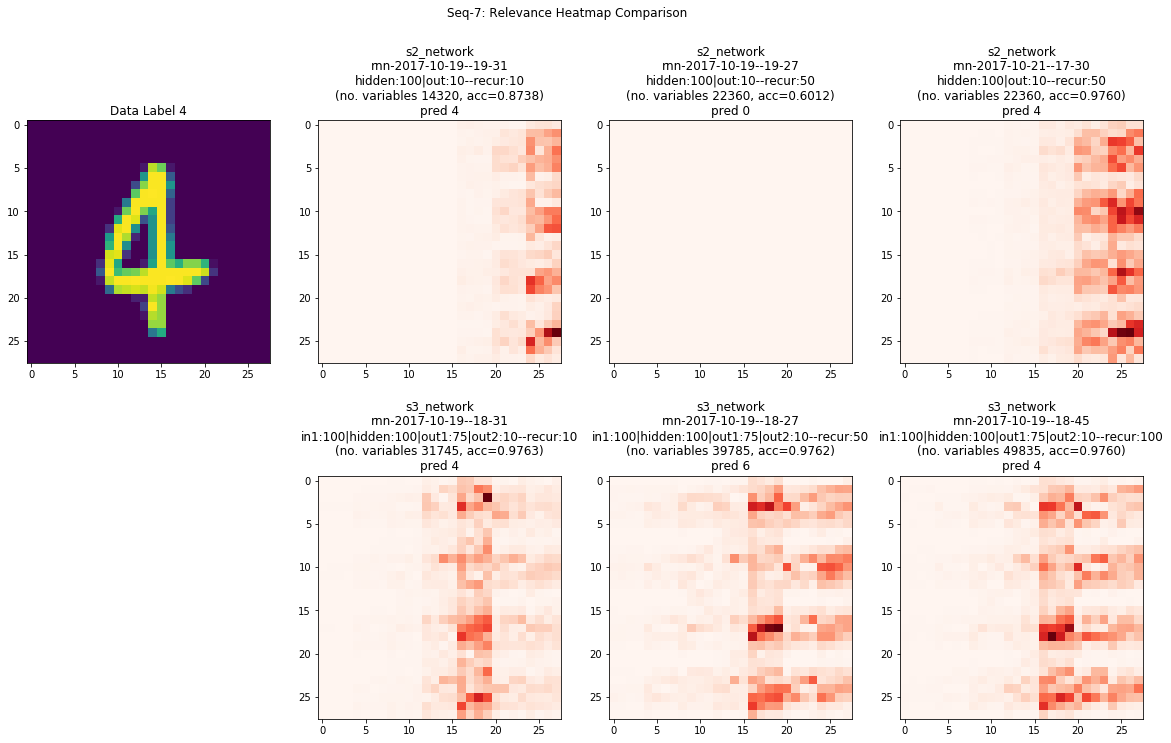

In [8]:
plot_heatmap(4751, s2_seq_7_models, s3_seq_7_models, suptitle='Seq-7: Relevance Heatmap Comparison')

## Seq Length : 14 ( 2 column )

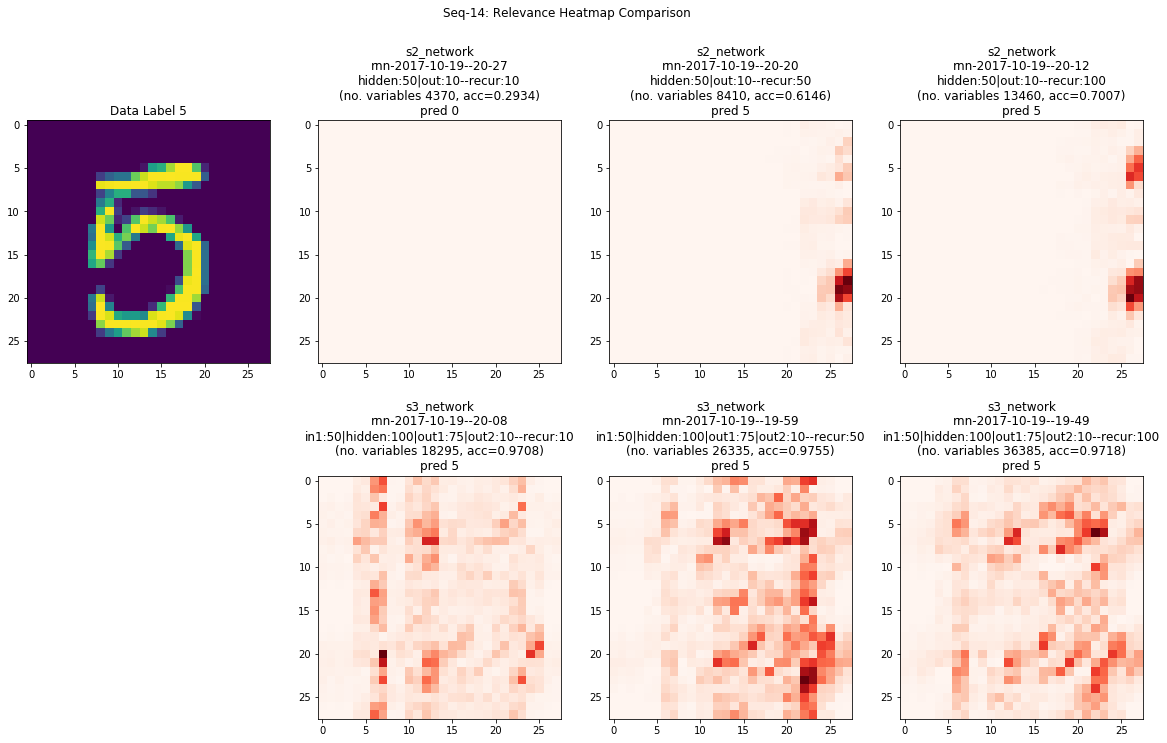

In [9]:
s2_seq_14_models = [
     ('s2_r:10', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-27'),
     ('s2_r:50', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-20'),
     ('s2_r:100', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-12'),
]

s3_seq_14_models = [
    ('s3_r:10', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--20-08'),
    ('s3_r:50', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-59'),
    ('s3_r:100', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--19-49'),
]

plot_heatmap(4420, s2_seq_14_models, s3_seq_14_models, suptitle='Seq-14: Relevance Heatmap Comparison')

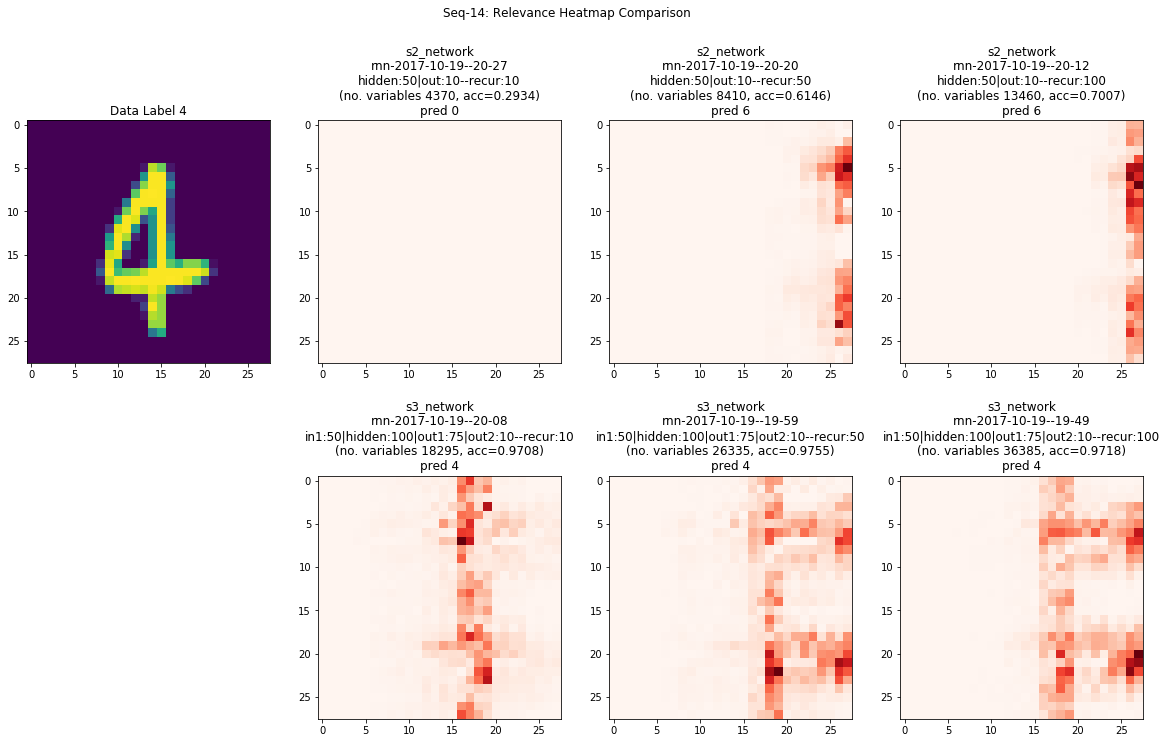

In [10]:
plot_heatmap(4751, s2_seq_14_models, s3_seq_14_models, suptitle='Seq-14: Relevance Heatmap Comparison')

## Seq length : 28 ( 1 col at a time )

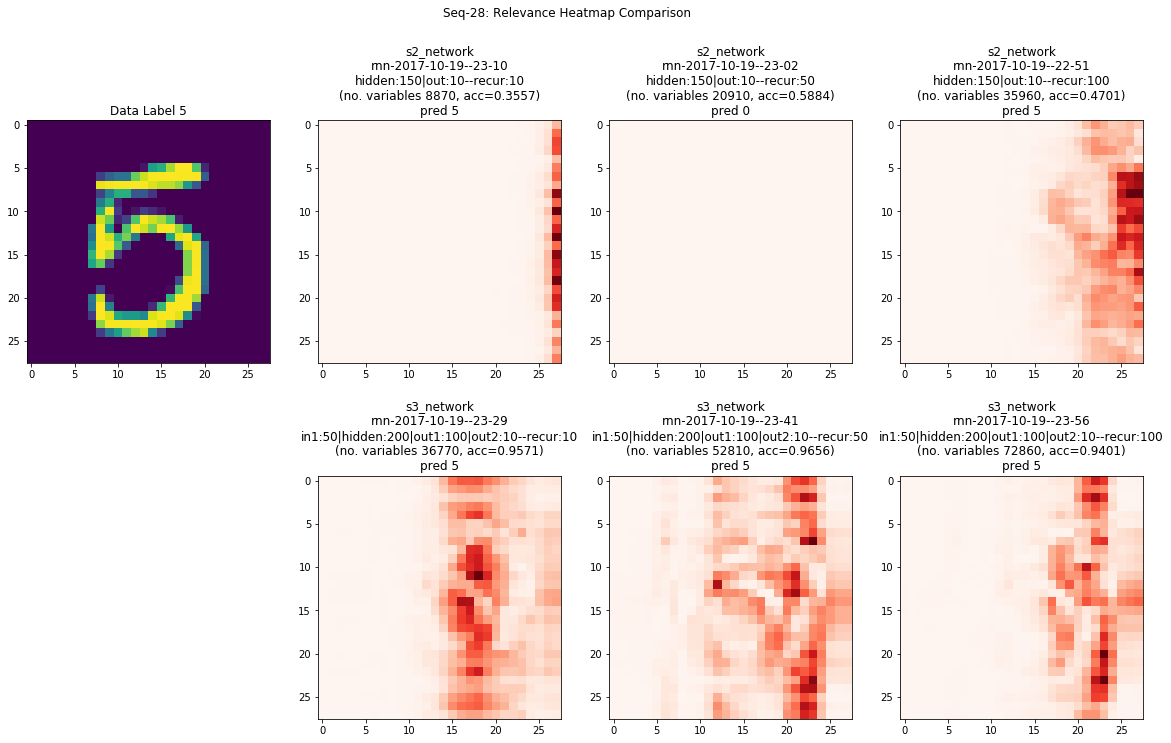

In [11]:
s2_seq_28_models = [
     ('s2_r:10', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-10'),
     ('s2_r:50', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-02'),
     ('s2_r:100', s2_network.S2Network, '../experiment-results/sprint-4/rnn-2017-10-19--22-51'),
]

s3_seq_28_models = [
    ('s3_r:10', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-29'),
    ('s3_r:50', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-41'),
    ('s3_r:100', s3_network.S3Network, '../experiment-results/sprint-4/rnn-2017-10-19--23-56'),
]

plot_heatmap(4420, s2_seq_28_models, s3_seq_28_models, suptitle='Seq-28: Relevance Heatmap Comparison')

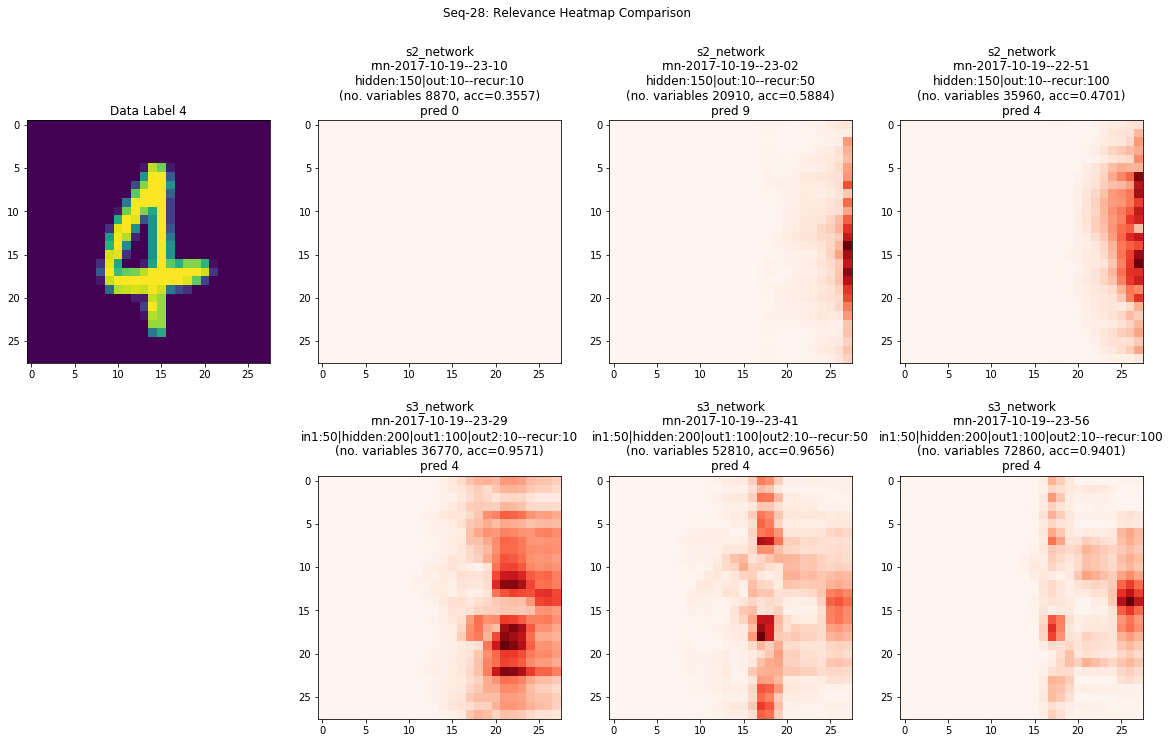

In [12]:
plot_heatmap(4751, s2_seq_28_models, s3_seq_28_models, suptitle='Seq-28: Relevance Heatmap Comparison')

# Sprint 5th

## Grid Search Results
I've used grid search to find good models of the two networks using the setting below

**S2 Network**'s hypeerparameter setting
 - hidden_units: [400, 800, 1000]
 - recurrent_units: [50, 100, 200]
 - keep_prob: [0.5, 0.8, 1]

**S3 Network**'s hypeerparameter setting
 - hidden_units: [200, 400]
 - recurrent_units: [50, 100]
 - in1_units: [400, 800, 1000]
 - out1_units: [200, 400]
 - keep_prob: [0.5, 1]


So far, the best models that I have got are:

| network  | name | architecture | test accuracy | no. variables |
|---       | -----|    ------ | --------- |
| s2_network | **rnn-2017-10-25--03-06** | hidden:1000&#124;out:10--recur:100 | 0.9816 | 323110 |
| s2_network | rnn-2017-10-25--01-59 | hidden:1000&#124;out:10--recur:200 | 0.9813 | 523210  |
| s2_network | rnn-2017-10-24--23-21 | hidden:400&#124;out:10--recur:50 | 0.9808 | 89260 |



| network  | name | architecture | test accuracy | no. variables |
|---       | -----|    ------ | --------- |
| s3_network | rnn-2017-10-22--14-41 | in1:400&#124;hidden:400&#124;out1:200&#124;out2:10--recur:100 | 0.9864 | 367910 |
| s3_network | rnn-2017-10-22--00-50 | in1:800&#124;hidden:400&#124;out1:200&#124;out2:10--recur:50  | 0.9849 | 533060 |
| ... |
| s3_network | **rnn-2017-10-21--19-18** | in1:800&#124;hidden:200&#124;out1:200&#124;out2:10--recur:50 |0.9827| 312860 |


**Interpretation of columns**
- **Architecture** : for example, *hidden:100|out:10--recur:50* means 
        - 100 neurons at hidden layer
        - 10 neurons at output layer
        - 50 neurons at recurrent layer
- **No. variables** : no. of weights and biases used in the network


Personally, I think models with *acc > 0.98* are good enough. However, I feel that it might not sound to do a comparison between the best of the two architectures as the number of variables in the networks are quite different (~40k).

So, my idea is to compare between the best of **S2Network**, *rnn-2017-10-25--03-06* and one of **S3Network** that has almost the same number of variables. In this case, it's **rnn-2017-10-21--19-18**. Results from these two networks are highlighted with trick borders in the following section.

## Relevance heatmap from the best models

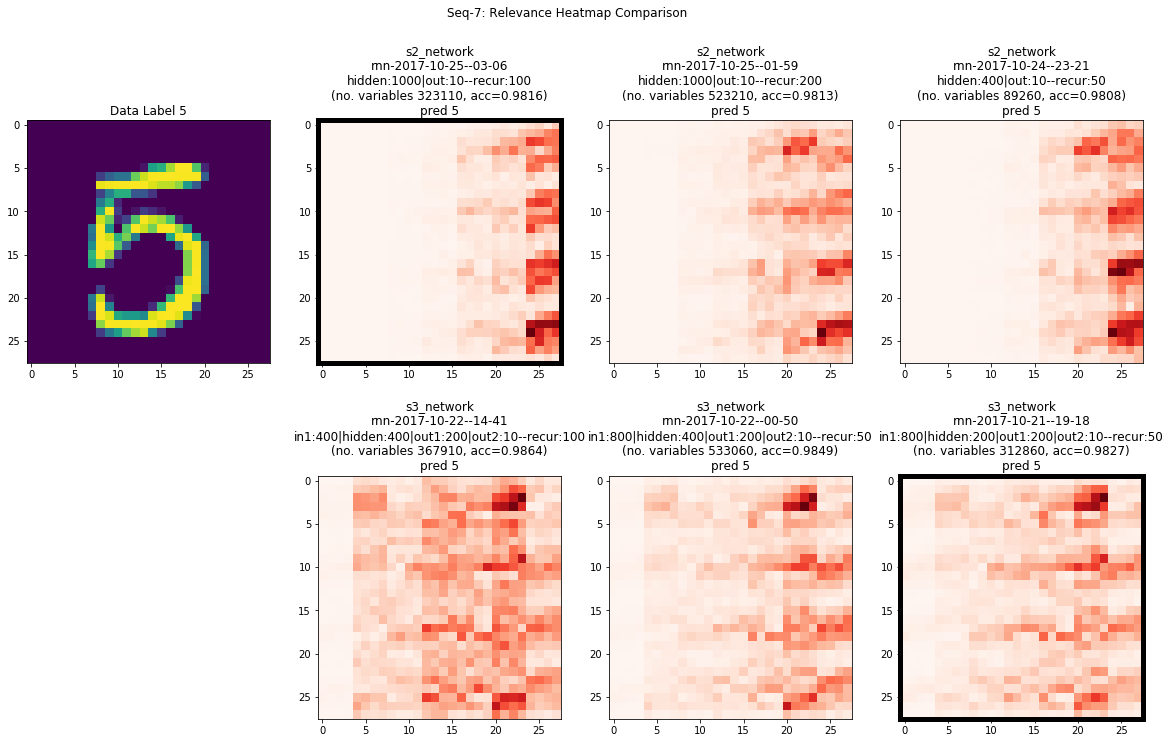

In [152]:
s5_seq_7_models_row1 = [
     ('s2', s2_network.S2Network, '../experiment-results/sprint-5/rnn-2017-10-25--03-06'),
     ('s2', s2_network.S2Network, '../experiment-results/sprint-5/rnn-2017-10-25--01-59'),
     ('s2', s2_network.S2Network, '../experiment-results/sprint-5/rnn-2017-10-24--23-21'),
]

s5_seq_7_models_row2 = [
     ('s3', s3_network.S3Network, '../experiment-results/sprint-5/rnn-2017-10-22--14-41'),
     ('s3', s3_network.S3Network, '../experiment-results/sprint-5/rnn-2017-10-22--00-50'),
     ('s3', s3_network.S3Network, '../experiment-results/sprint-5/rnn-2017-10-21--19-18'),
]

def plot_s5_experiments(data_idx):
    highlight_plots = [2,8]
    plot_heatmap(data_idx, s5_seq_7_models_row1, s5_seq_7_models_row2,
                 suptitle='Seq-7: Relevance Heatmap Comparison', highlight_plots=highlight_plots)
    
plot_s5_experiments(4420)

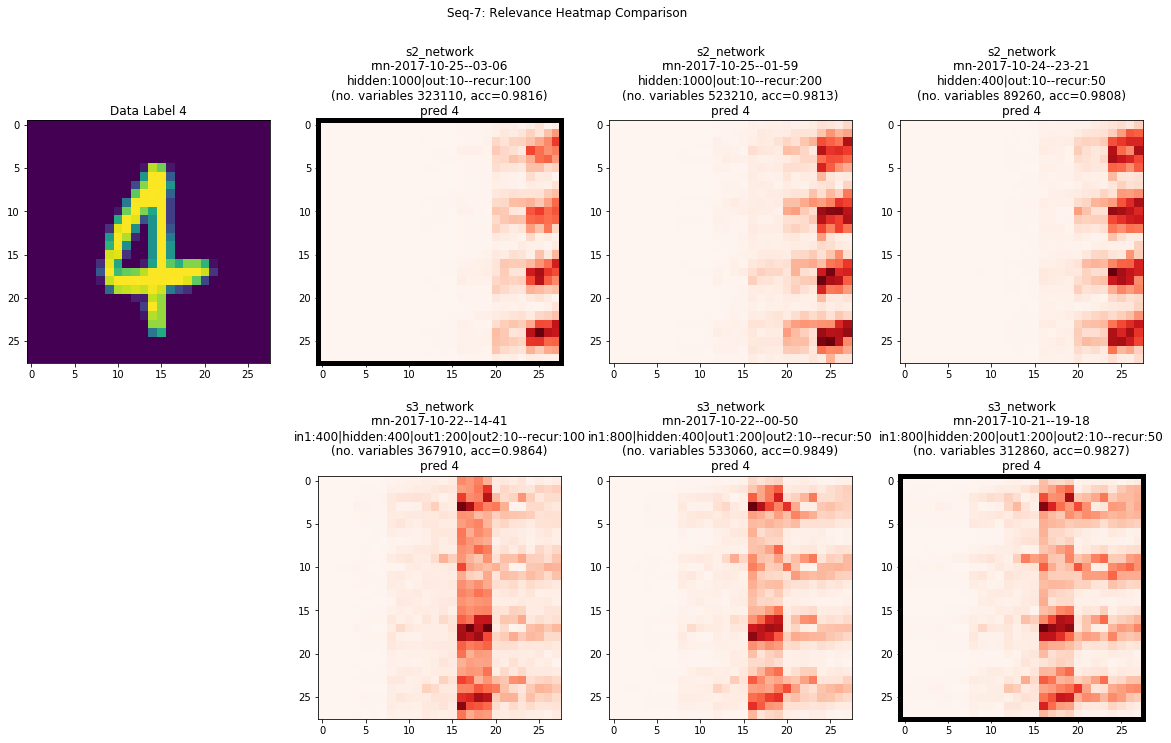

In [14]:
plot_s5_experiments(4751)

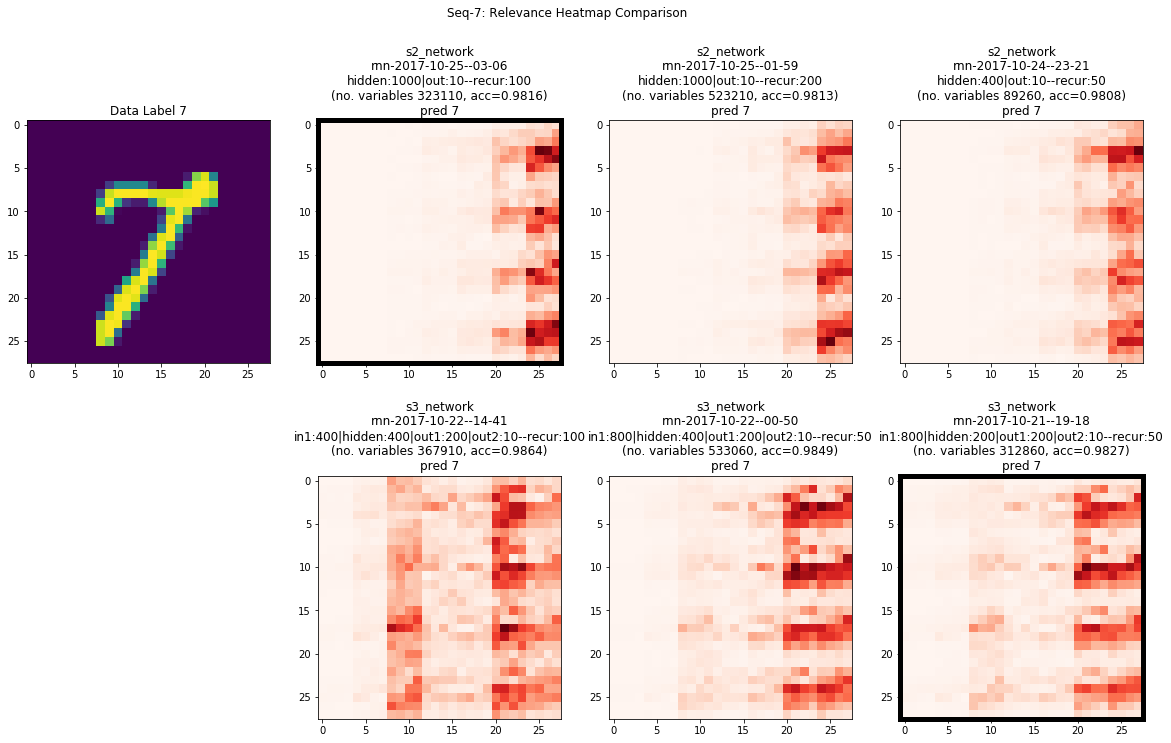

In [15]:
plot_s5_experiments(4900)

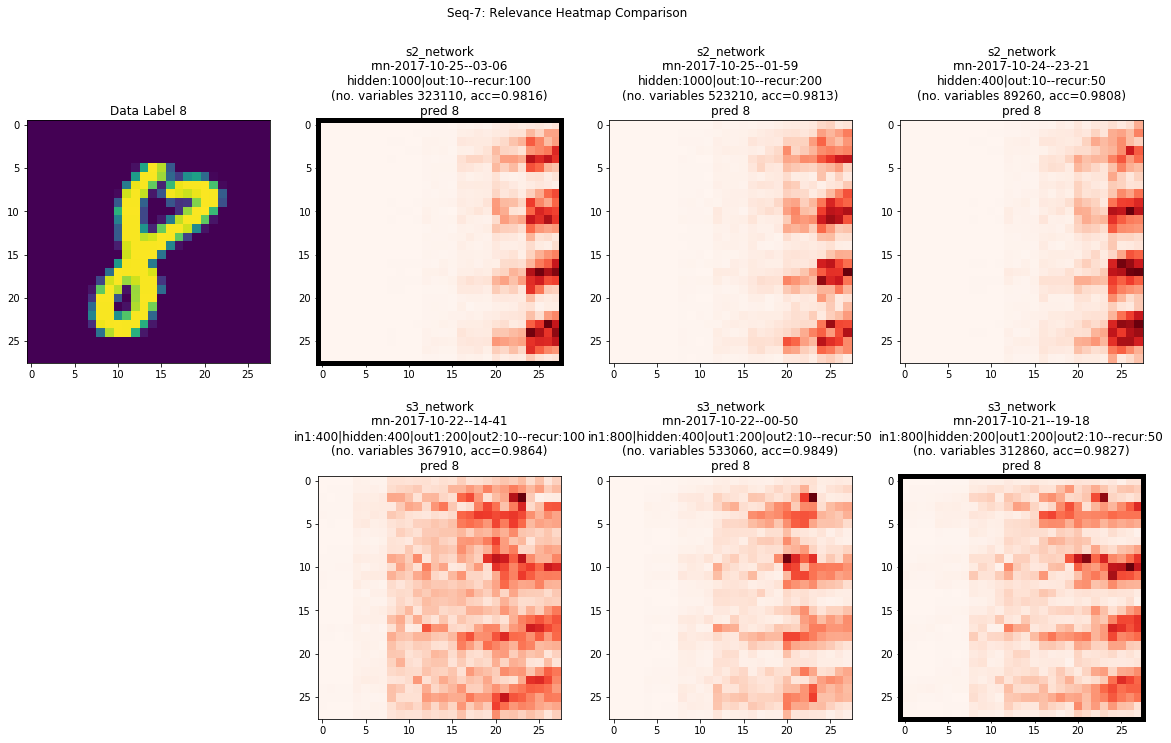

In [16]:
plot_s5_experiments(8894)

## Visualize layers

### S2 Network

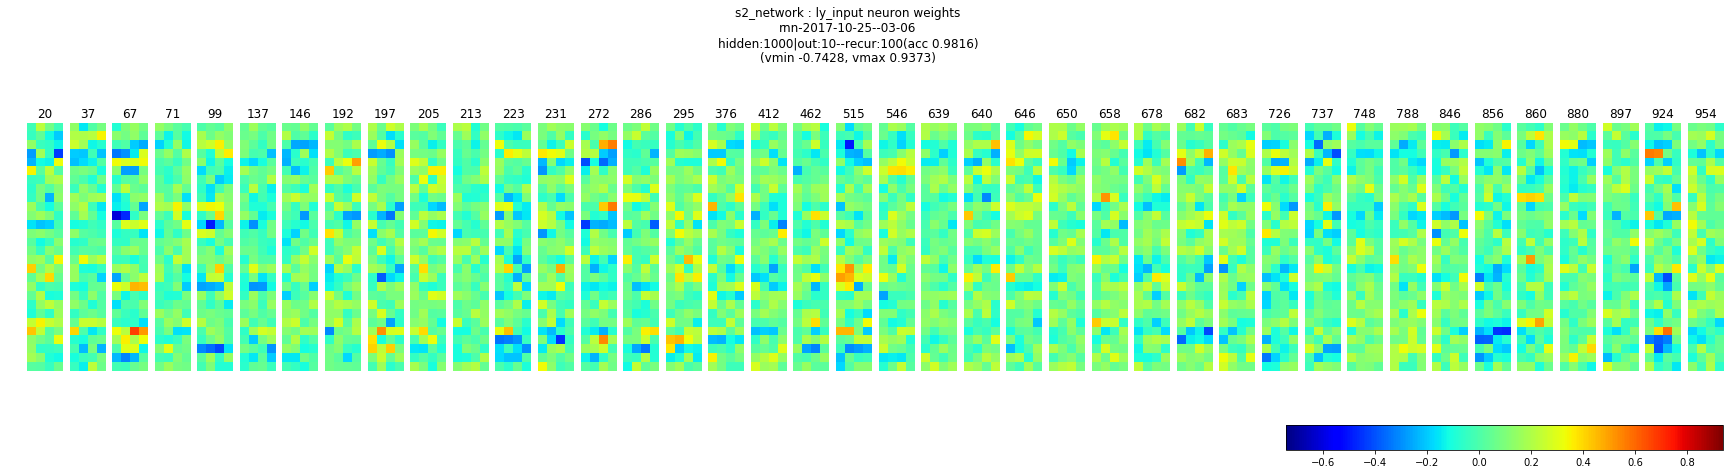

In [418]:
def plot_layer(model, layer_name, col_selector=-1, seed = 1, nrows=1, ncols=40, img_shape=(28,4), no_plots=40,row_size=6, col_size=0.76 ):

    model_obj = model[1].load(model[2])

    with model_obj.get_session() as sess:
        w = getattr(model_obj.dag, layer_name).W.eval(session=sess)
        
    w_selected = w[:col_selector, :].T
    
    vmin = np.min(w_selected)
    vmax = np.max(w_selected)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(col_size*ncols,row_size*nrows + 1))
    np.random.seed(2)
    indices = sorted(np.random.choice(w_selected.shape[0], size=no_plots, replace=False))
    for i, ax in zip(indices,axes.flat):

        im = ax.imshow(w_selected[i,:].reshape(*img_shape), cmap='jet', vmin=vmin, vmax=vmax)
        ax.axis('off')

        ax.set_title(i)

    plt.suptitle('%s : %s neuron weights\n%s\n%s(acc %.4f)\n(vmin %.4f, vmax %.4f)' % (
                model_obj._.architecture_name,
                layer_name,
                model_obj._.experiment_name,
                model_obj._.architecture,
                model_obj._.accuracy,
                vmin,
                vmax
    ))


    cbar_ax = fig.add_axes([1-0.3, 0.1, 0.2, 0.05])
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

    plt.show()
plot_layer(s5_seq_7_models_row1[0], 'ly_input', col_selector=28*4)    

#### 1st network

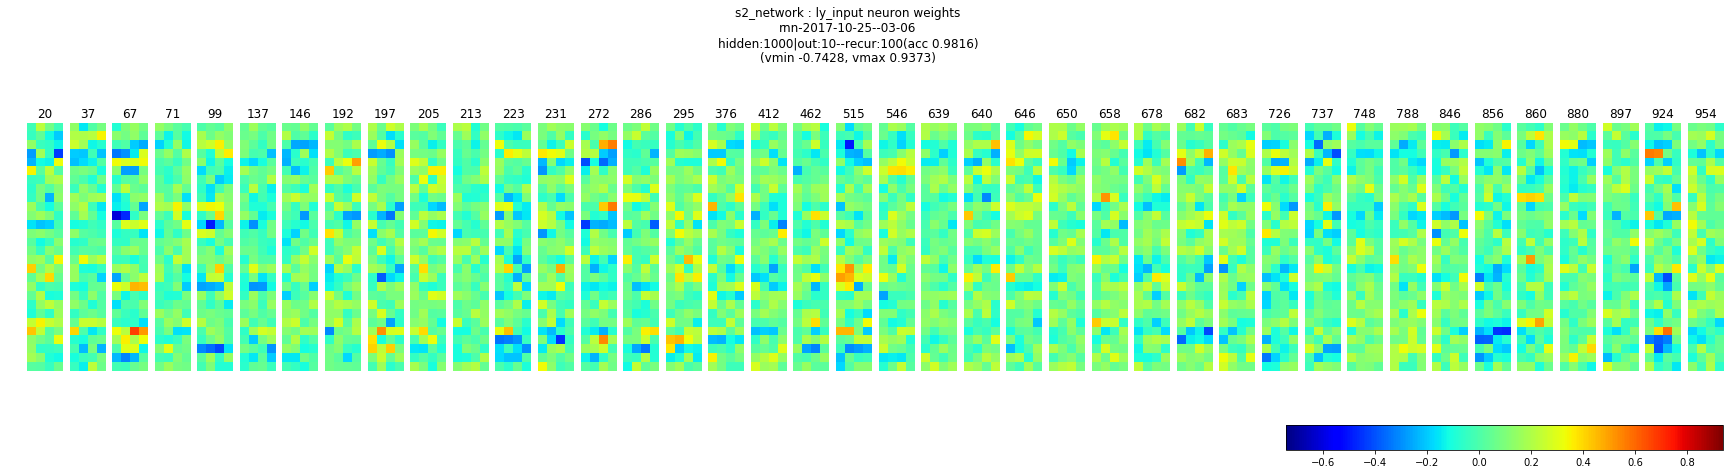

In [419]:
plot_layer(s5_seq_7_models_row1[0], 'ly_input', col_selector=28*4)

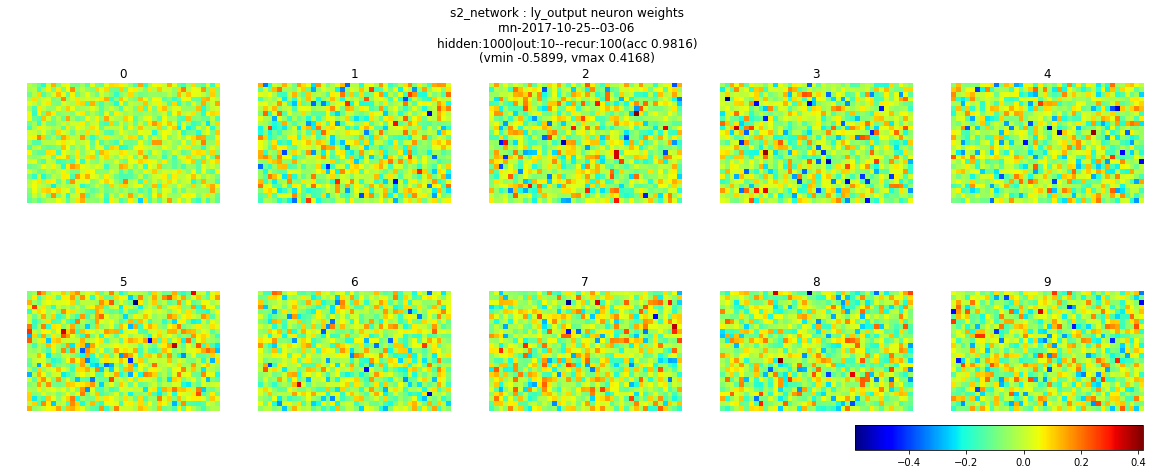

In [420]:
plot_layer(s5_seq_7_models_row1[0], 'ly_output', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

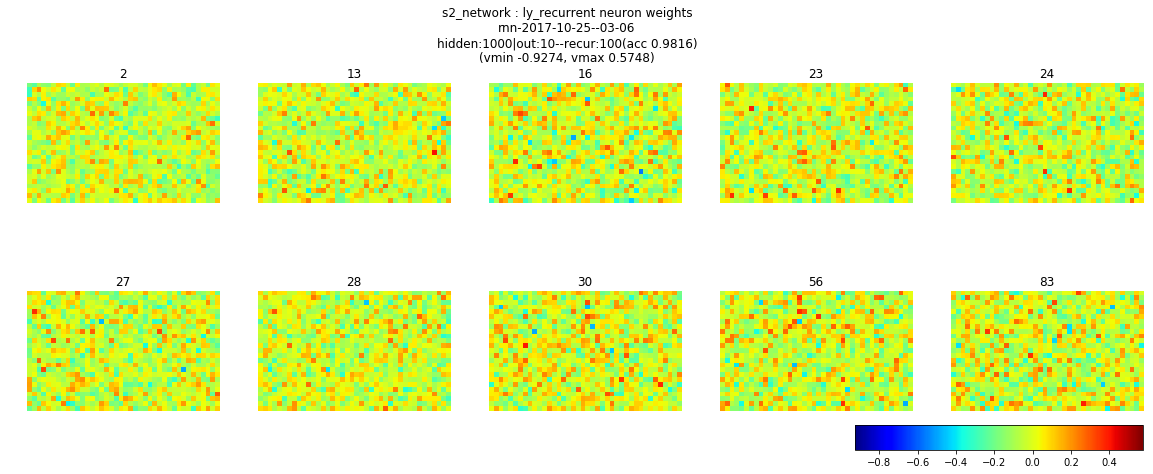

In [421]:
plot_layer(s5_seq_7_models_row1[0], 'ly_recurrent', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

#### 2nd network

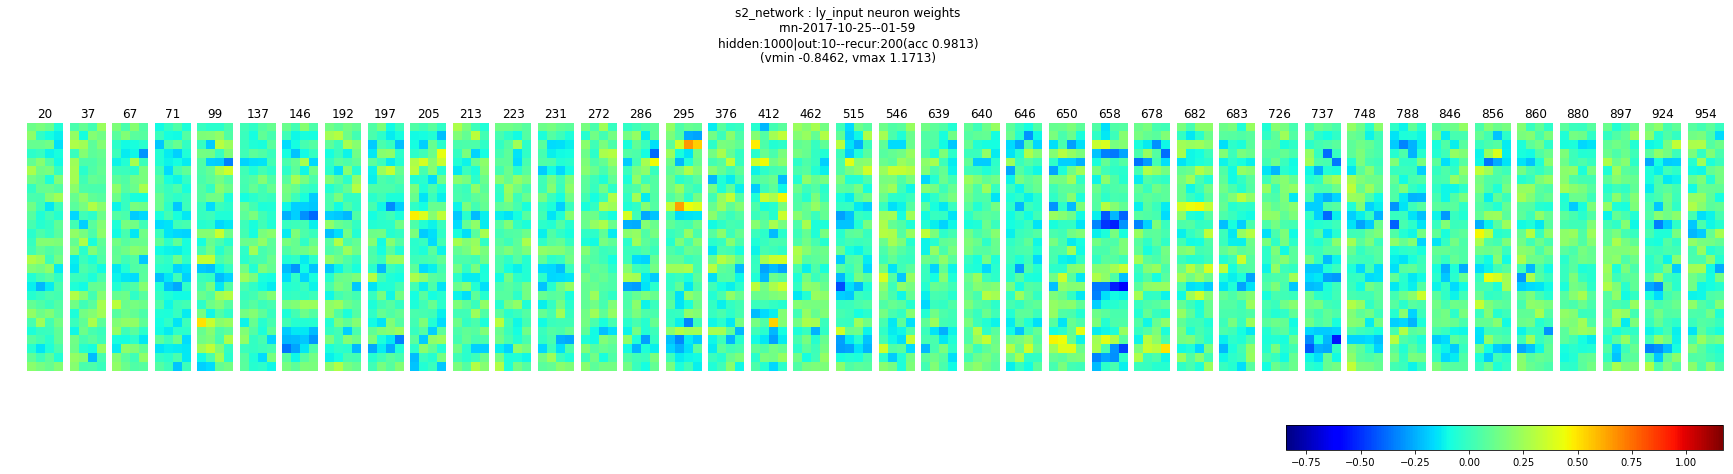

In [422]:
plot_layer(s5_seq_7_models_row1[1], 'ly_input', col_selector=28*4)

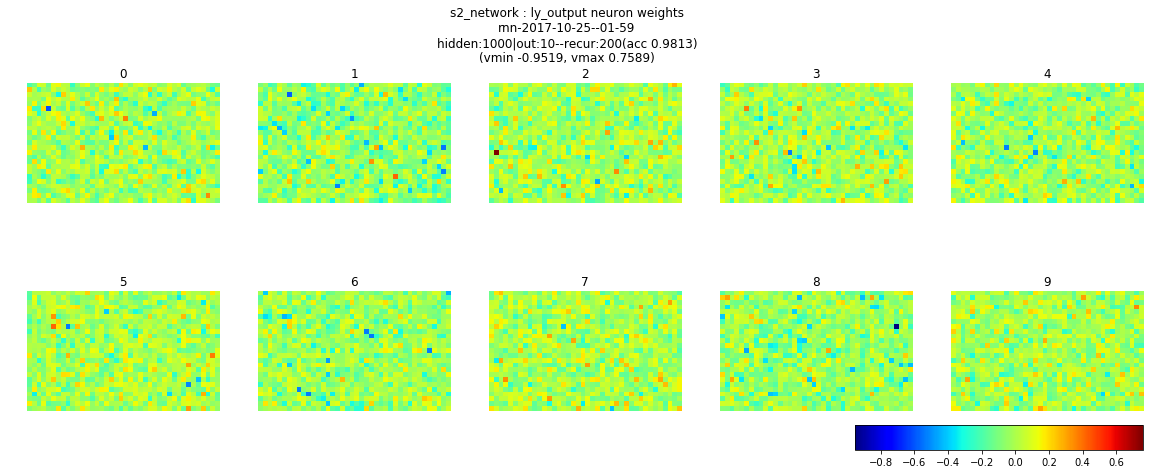

In [423]:
plot_layer(s5_seq_7_models_row1[1], 'ly_output', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

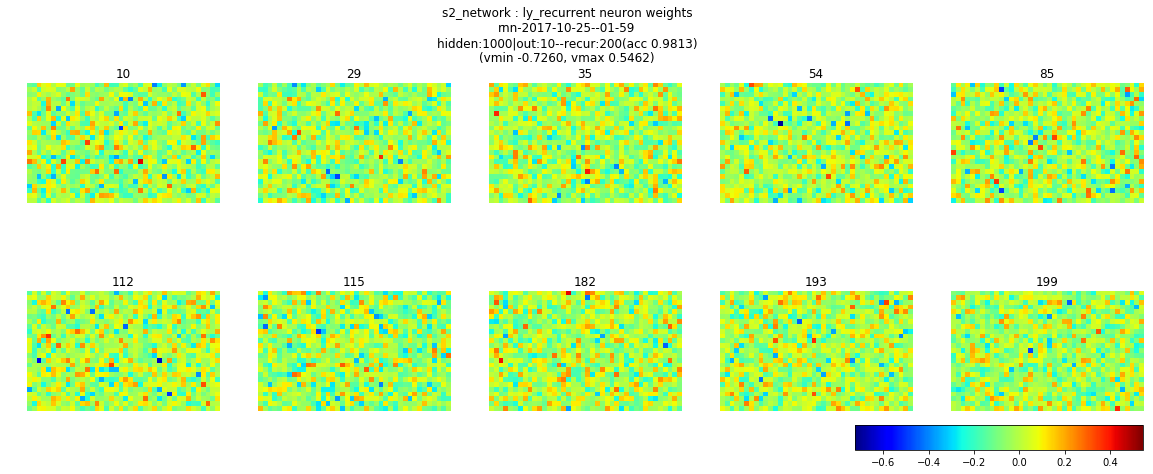

In [424]:
plot_layer(s5_seq_7_models_row1[1], 'ly_recurrent', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

#### 3rd network

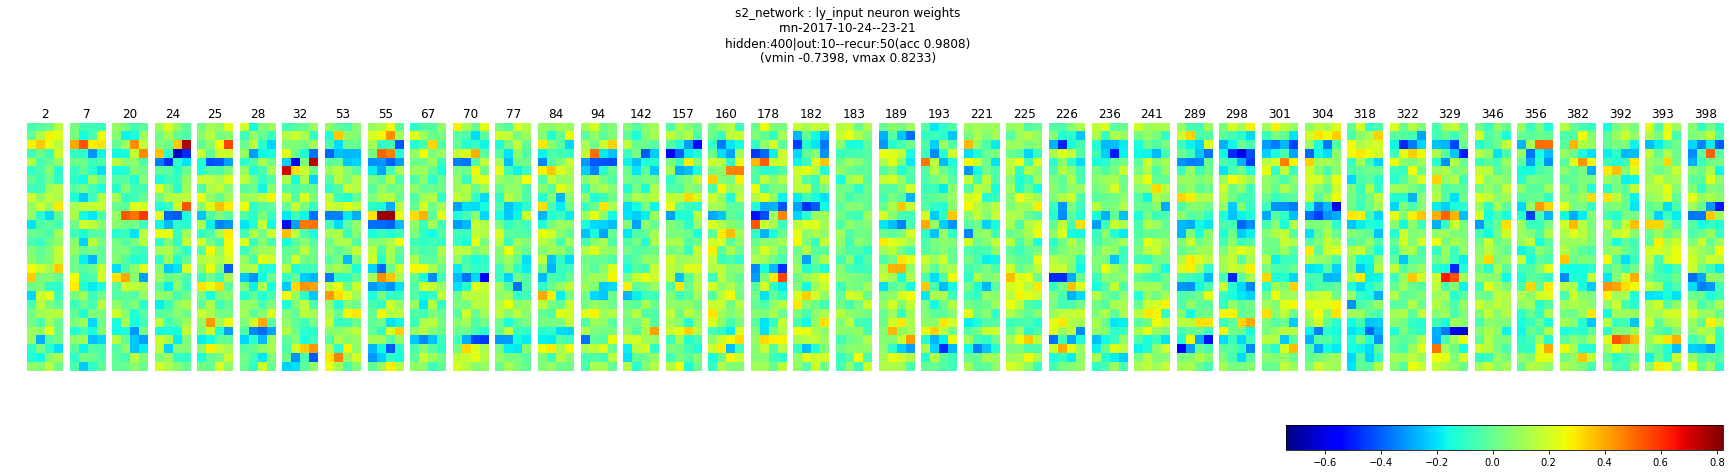

In [425]:
plot_layer(s5_seq_7_models_row1[2], 'ly_input', col_selector=28*4)

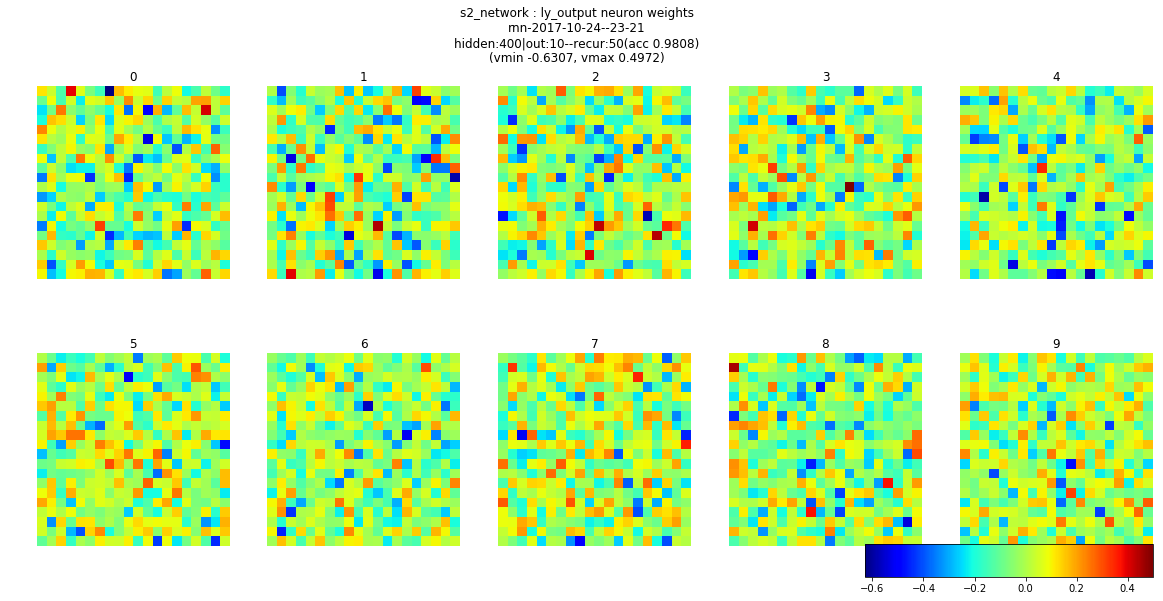

In [426]:
plot_layer(s5_seq_7_models_row1[2], 'ly_output', col_selector=None, nrows=2, ncols=5, img_shape=(20,20), no_plots=10,
           row_size=4, col_size=4)

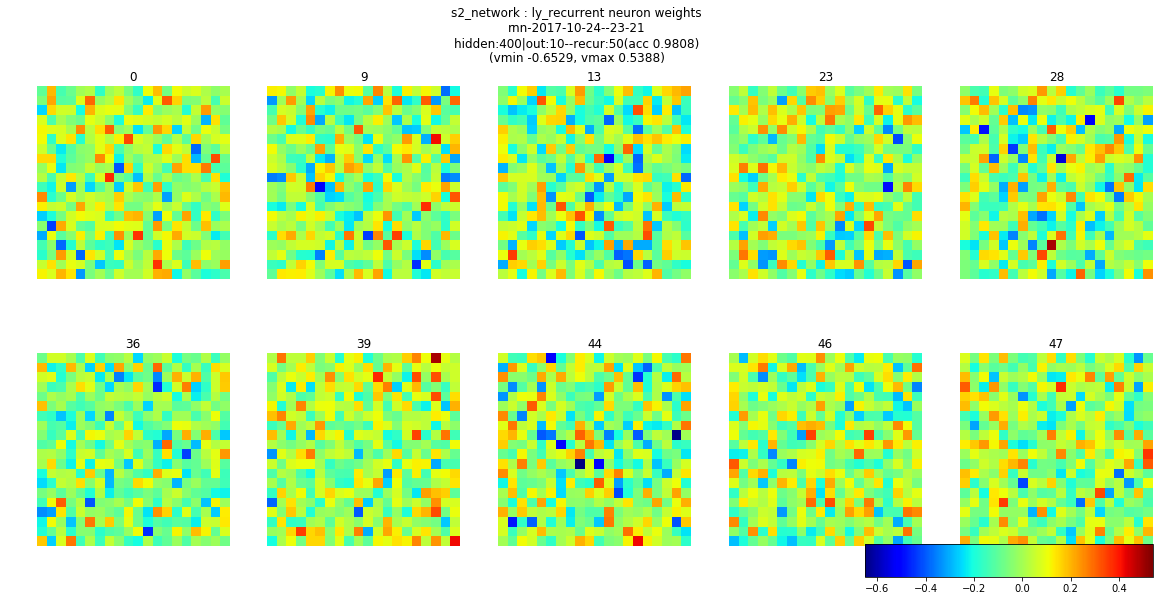

In [427]:
plot_layer(s5_seq_7_models_row1[2], 'ly_recurrent', col_selector=None, nrows=2, ncols=5, img_shape=(20,20), no_plots=10,
           row_size=4, col_size=4)

### S3 Network

#### 1st network

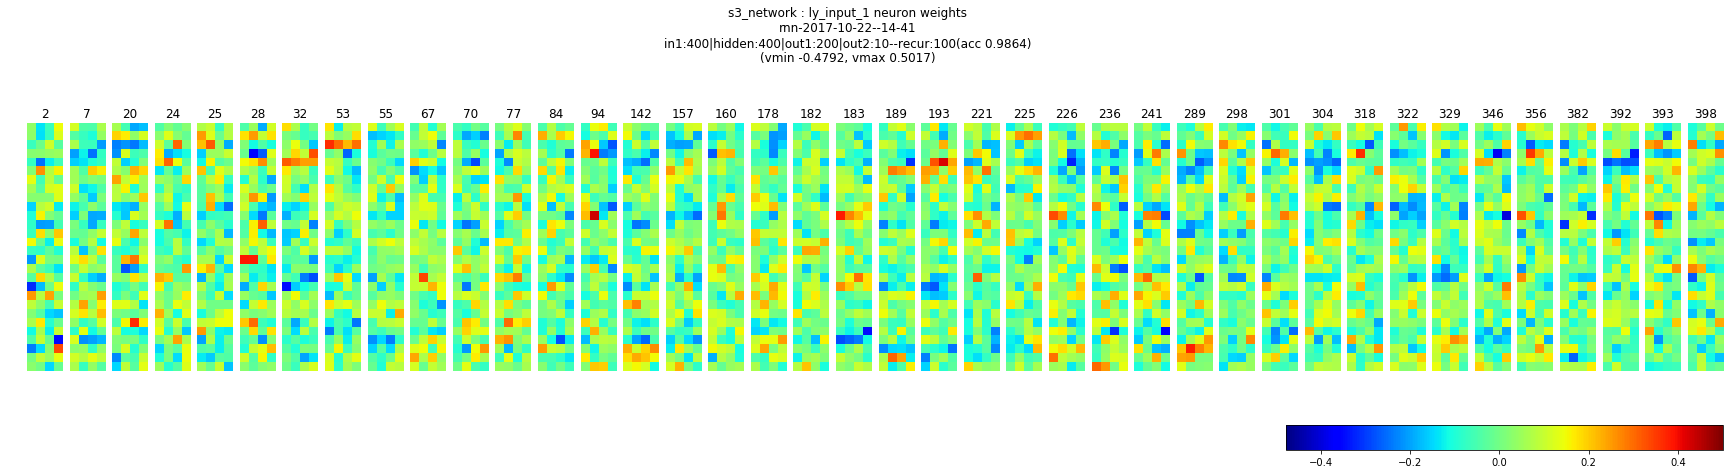

In [428]:
plot_layer(s5_seq_7_models_row2[0], 'ly_input_1', col_selector=None)

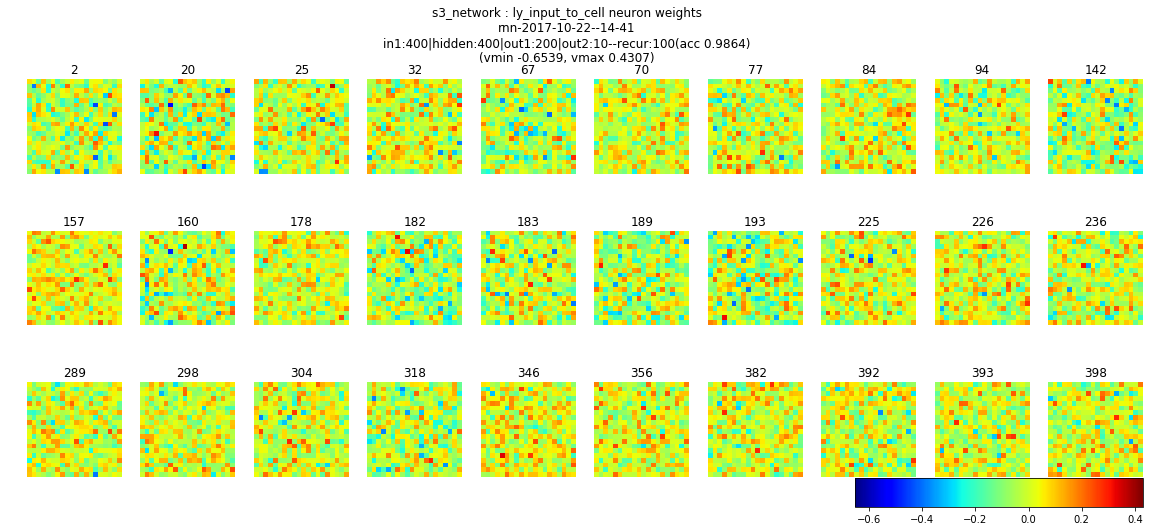

In [429]:
plot_layer(s5_seq_7_models_row2[0], 'ly_input_to_cell', col_selector=400, img_shape=(20,20), no_plots=30, ncols=10, nrows=3,
           col_size=2, row_size=2.3)

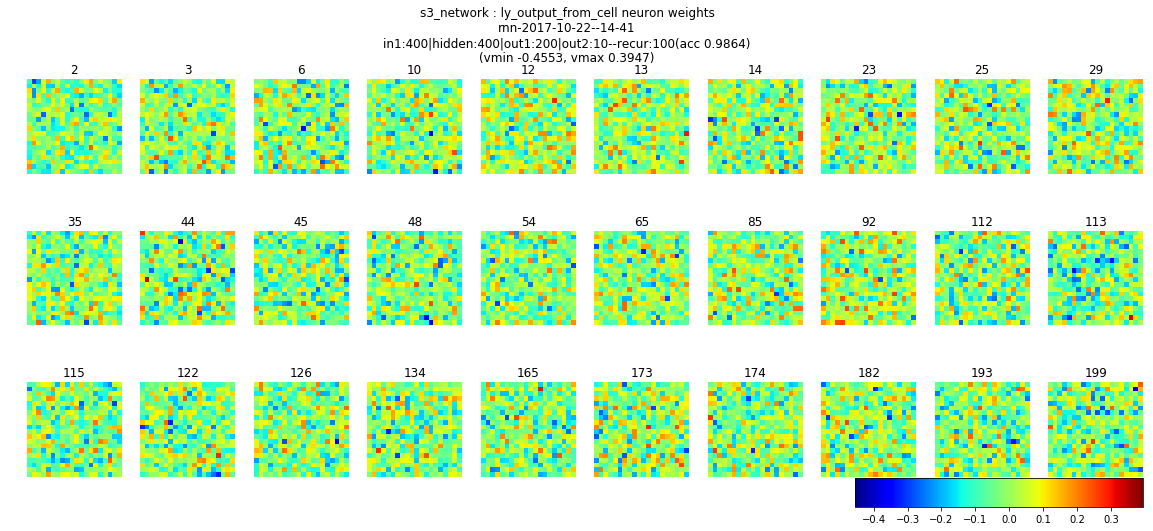

In [430]:
plot_layer(s5_seq_7_models_row2[0], 'ly_output_from_cell', col_selector=None, img_shape=(20,20), no_plots=30, ncols=10, nrows=3,
           col_size=2, row_size=2.3)

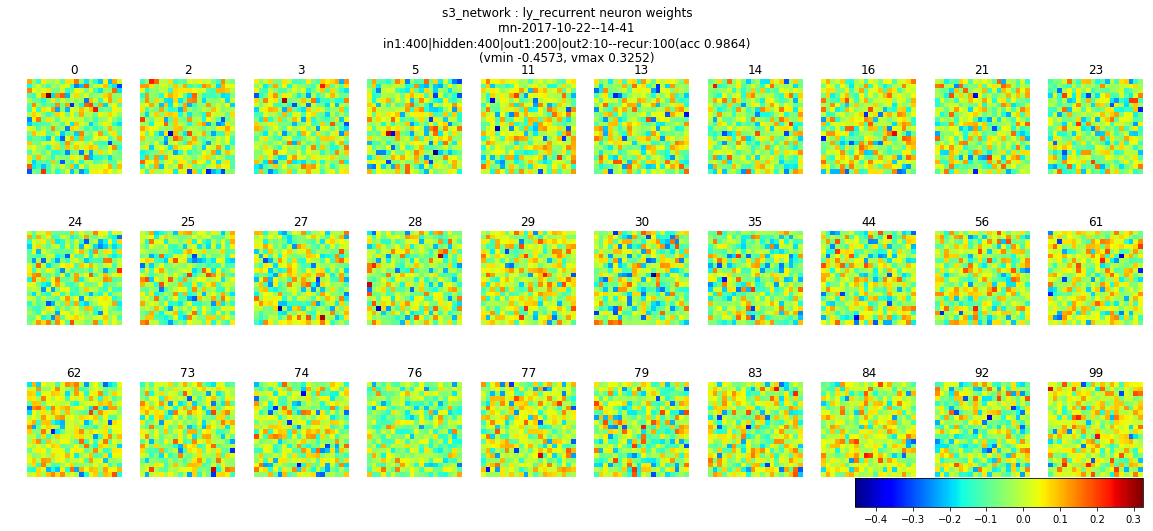

In [431]:
plot_layer(s5_seq_7_models_row2[0], 'ly_recurrent', col_selector=None, img_shape=(20,20), no_plots=30, ncols=10, nrows=3,
           col_size=2, row_size=2.3)

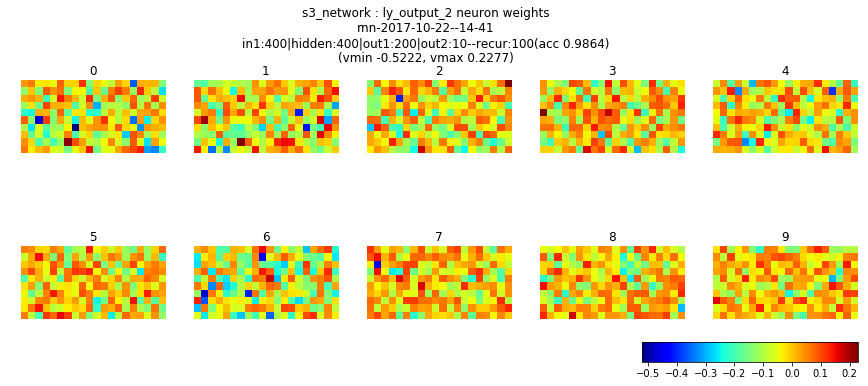

In [432]:
plot_layer(s5_seq_7_models_row2[0], 'ly_output_2', col_selector=None, img_shape=(10,20), no_plots=10, ncols=5, nrows=2,
           col_size=3, row_size=2.3)

#### 2nd network

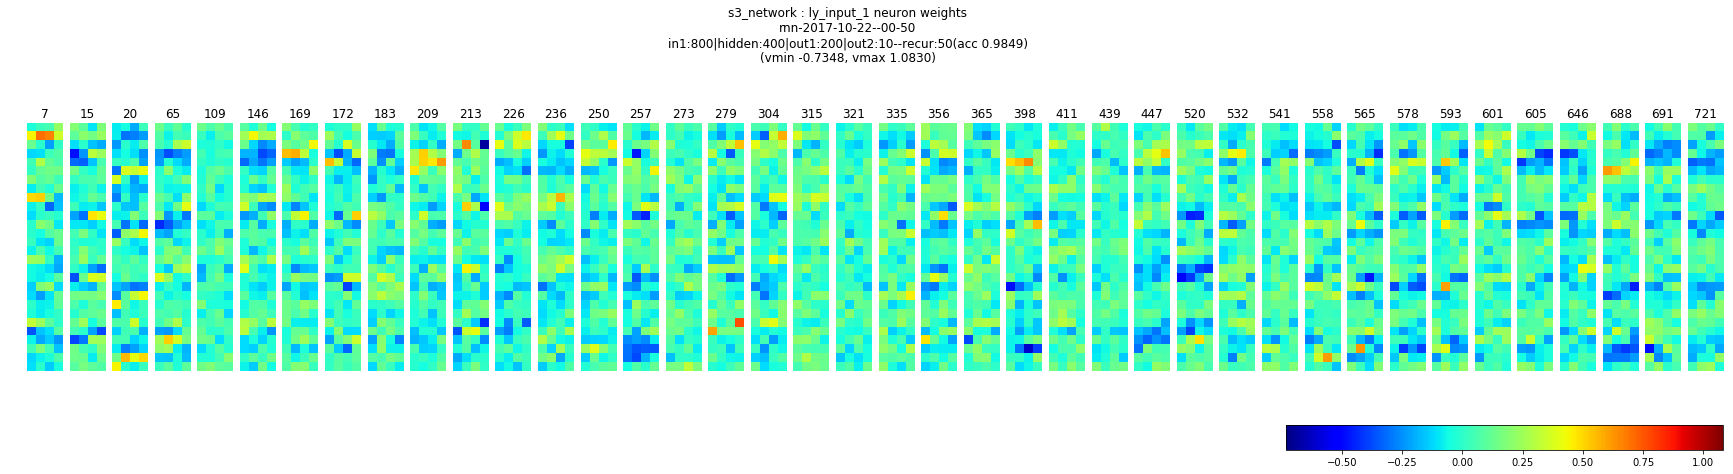

In [433]:
plot_layer(s5_seq_7_models_row2[1], 'ly_input_1', col_selector=None)

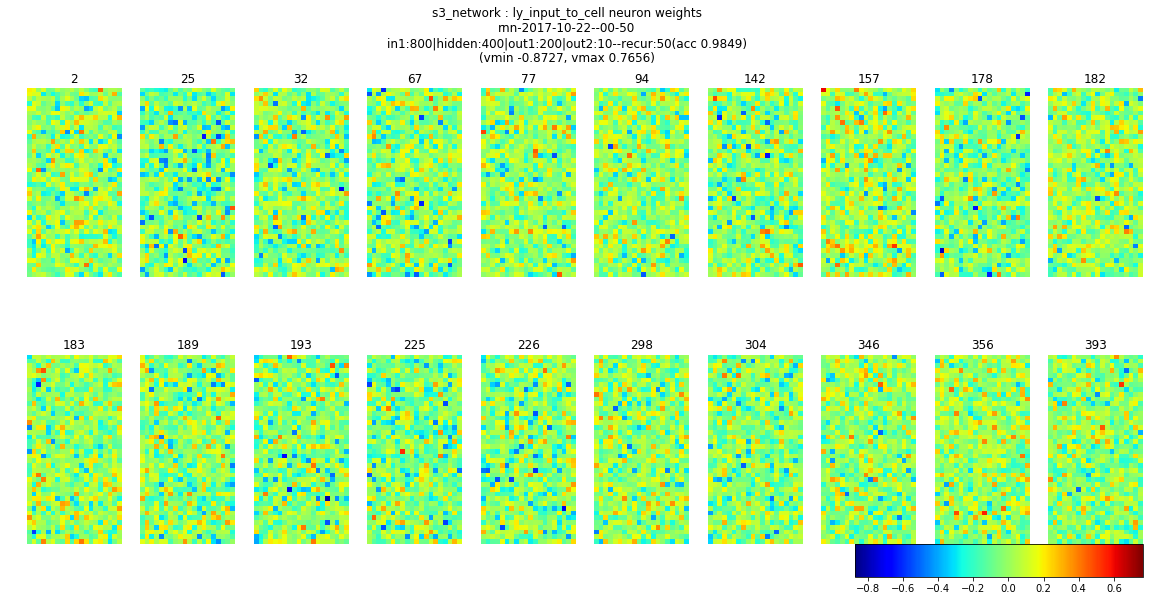

In [434]:
plot_layer(s5_seq_7_models_row2[1], 'ly_input_to_cell', col_selector=800, img_shape=(40,20), no_plots=20, ncols=10, nrows=2,
           col_size=2, row_size=4)

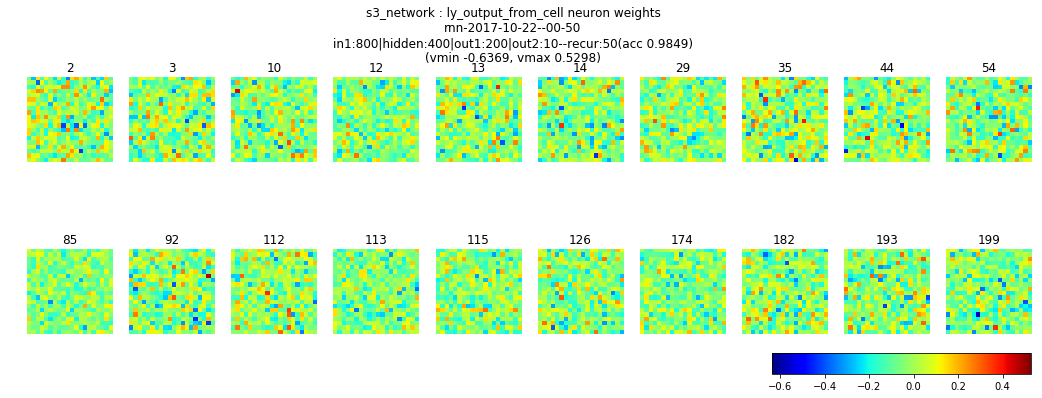

In [435]:
plot_layer(s5_seq_7_models_row2[1], 'ly_output_from_cell', col_selector=None, img_shape=(20,20), no_plots=20, ncols=10, nrows=2,
           col_size=1.8, row_size=2.4)

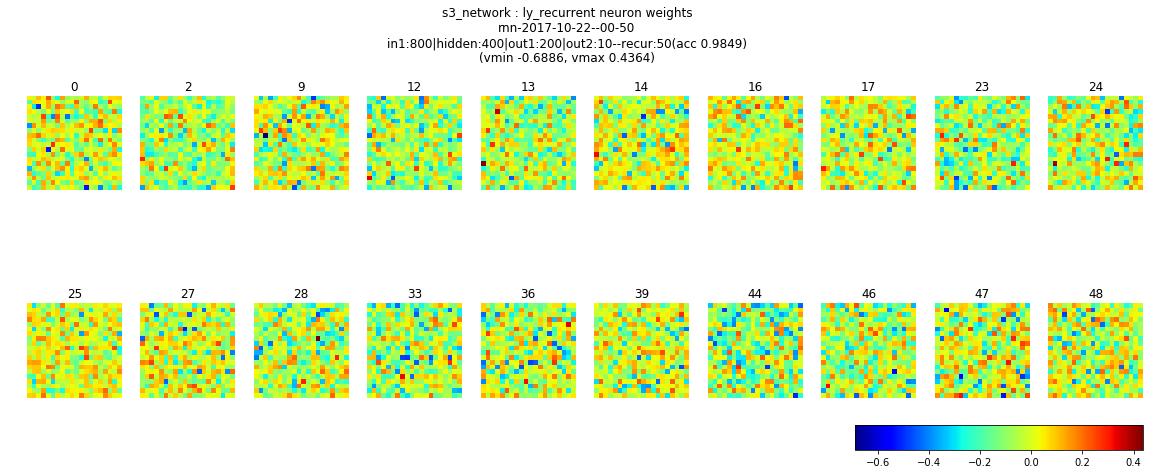

In [436]:
plot_layer(s5_seq_7_models_row2[1], 'ly_recurrent', col_selector=None, img_shape=(20,20), no_plots=20, ncols=10, nrows=2,
           col_size=2, row_size=3)

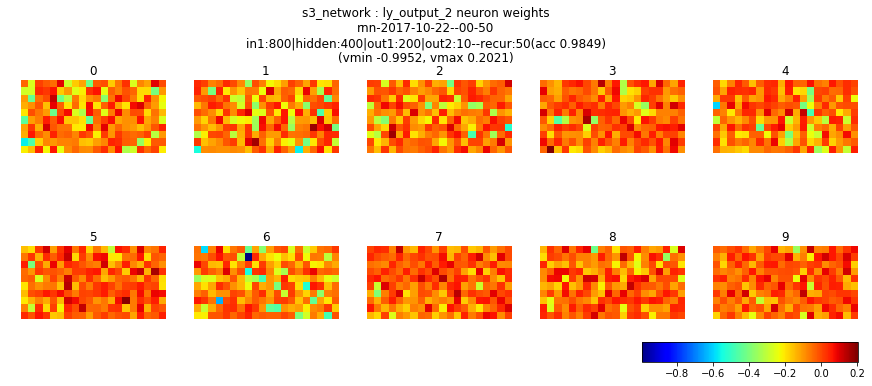

In [437]:
plot_layer(s5_seq_7_models_row2[1], 'ly_output_2', col_selector=None, img_shape=(10,20), no_plots=10, ncols=5, nrows=2,
           col_size=3, row_size=2.3)

#### 3rd network

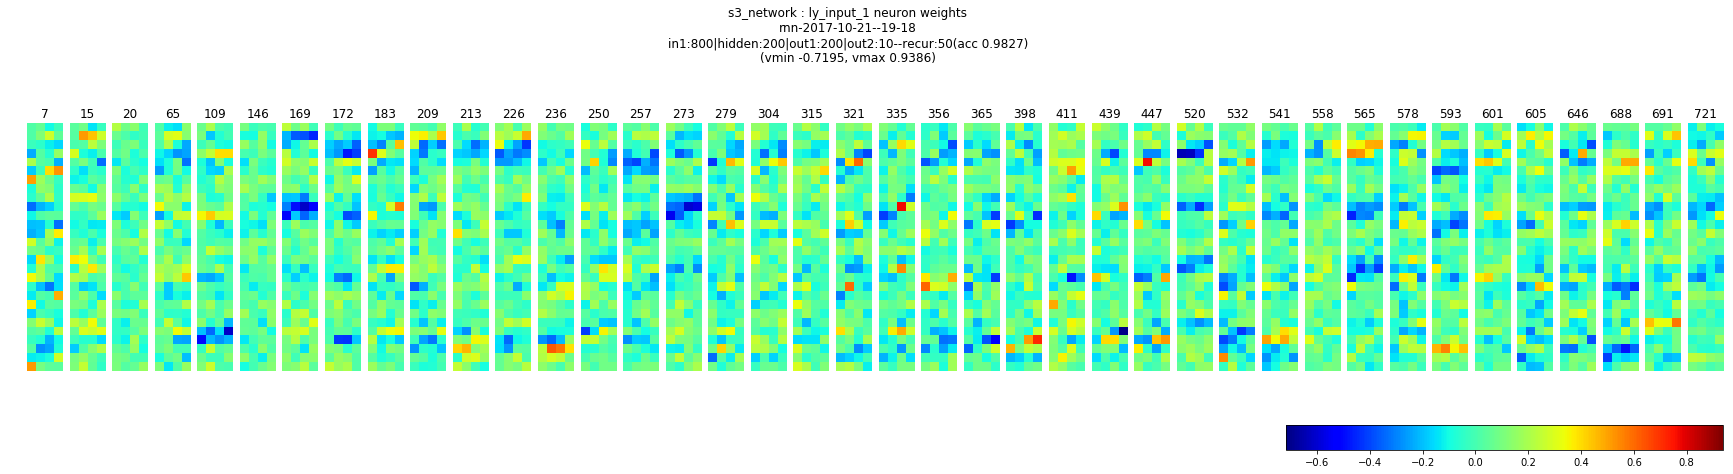

In [438]:
plot_layer(s5_seq_7_models_row2[2], 'ly_input_1', col_selector=None)

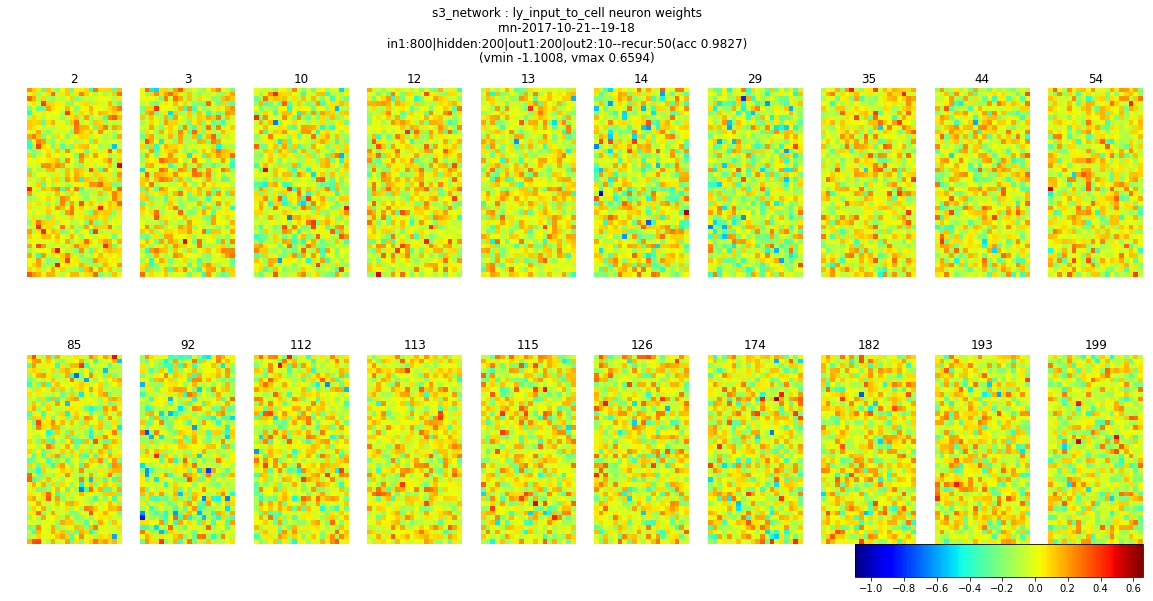

In [439]:
plot_layer(s5_seq_7_models_row2[2], 'ly_input_to_cell', col_selector=800, img_shape=(40,20), no_plots=20, ncols=10, nrows=2,
           col_size=2, row_size=4)

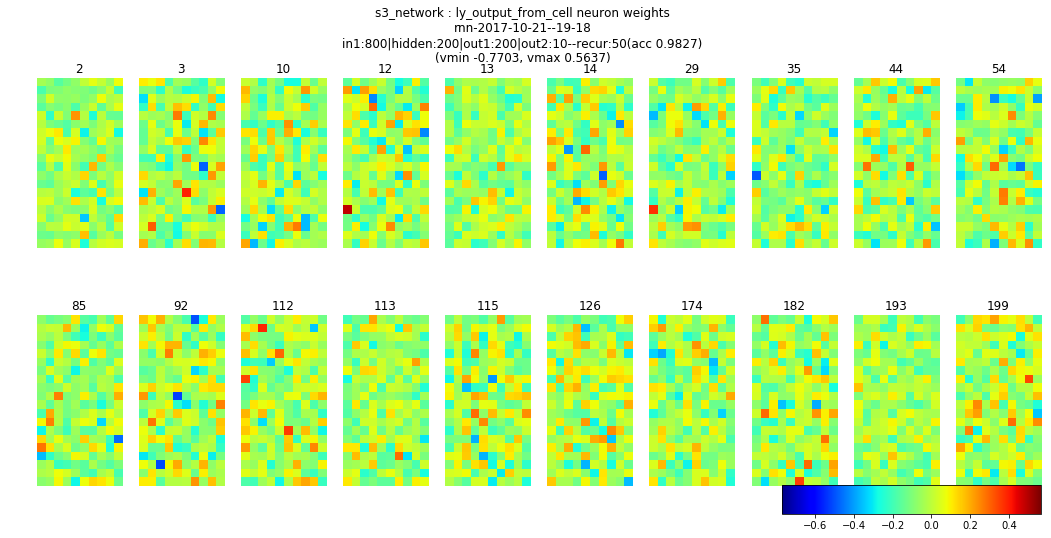

In [440]:
plot_layer(s5_seq_7_models_row2[2], 'ly_output_from_cell', col_selector=None, img_shape=(20,10), no_plots=20, ncols=10, nrows=2,
           col_size=1.8, row_size=3.5)

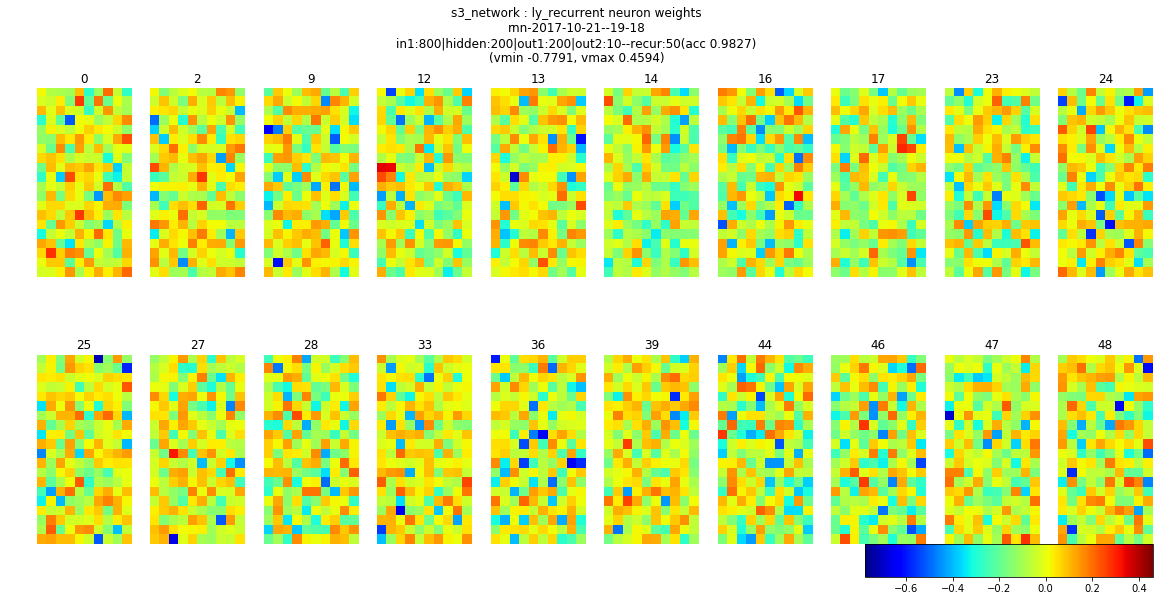

In [441]:
plot_layer(s5_seq_7_models_row2[2], 'ly_recurrent', col_selector=None, img_shape=(20,10), no_plots=20, ncols=10, nrows=2,
           col_size=2, row_size=4)

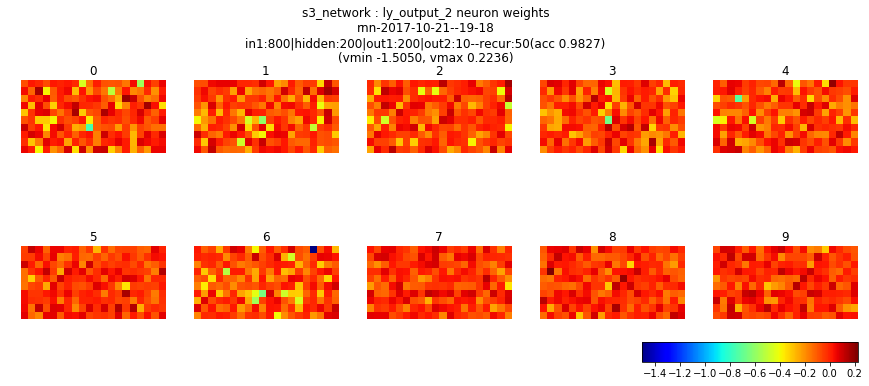

In [442]:
plot_layer(s5_seq_7_models_row2[2], 'ly_output_2', col_selector=None, img_shape=(10,20), no_plots=10, ncols=5, nrows=2,
           col_size=3, row_size=2.3)